In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import plotly.express as px
import seaborn as sns #visualization
from plotly.offline import init_notebook_mode, iplot, plot

Import Data

In [39]:
df = pd.read_csv('/content/sample_data/songs_normalize.csv')
#df.head()

## **Preprocessing data**

The data set doesn't have any null values.
It has some duplicate entries that will be removed.

Also we can convert the songs duration to seconds for better readibilty.

In [40]:
df = df.drop_duplicates() # keep first duplicate row
df["duration_s"] = df.duration_ms.apply(lambda x : round(x/1000)) # add durartion in seconds
df.drop("duration_ms", axis=1, inplace=True) #remove duration in ms

In [ ]:

#Top Hits by Year
songs_per_years = df['year'].value_counts().sort_index()

iplot(px.bar(songs_per_years, 
       title='Songs per year', 
       text_auto='.2s',
       labels=dict(index='year',value='number of songs'),
       color_discrete_sequence=['#0055FF']
      ).update_xaxes(type='category'))


Since the years 1998, 1999 and 2020 have few examples, we will be removing songs from those years.
Also, we considered that the song **title** won't have any correlation with its popularity, so that column will be removed.


```
# This is formatted as code
```



In [42]:
df = df[(df.year >= 2000) & (df.year <= 2019)] 
df = df.drop(['song'], axis = 1) #removing song title column
#df.head()


In [ ]:
#df.info()

## Popularity classification
First let's analise the popularity distribution, and try to indentify existing outliers 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4313429390>]],
      dtype=object)

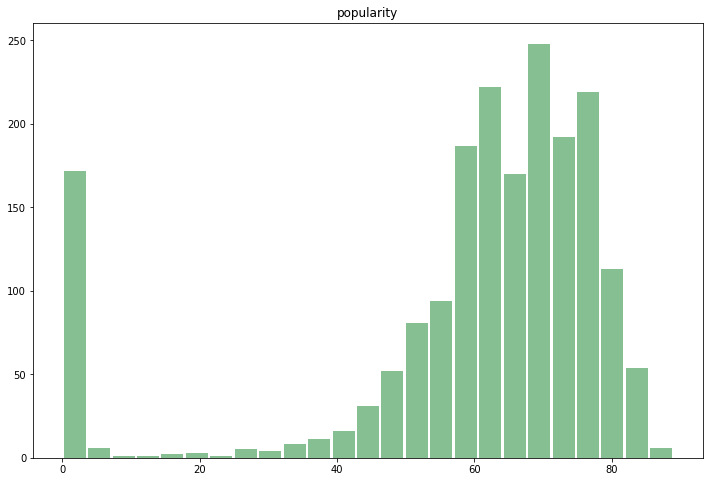

In [49]:
df.hist(column=('popularity'),bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


#### Removing entries 
While analising the histogram, we found strange that a lot of songs had the popularity equal to zero. 
After loooking through the data, we noticed that that most of those songs were undoubtedly misclassified. For example, songs like Hello by Adele, or Despacito by Luis Fonsi, among others, were classified with zero popularity even though they are known songs for beating selling and streaming records.

In [60]:
df = df[(df.popularity > 5)] 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4312f6fcd0>]],
      dtype=object)

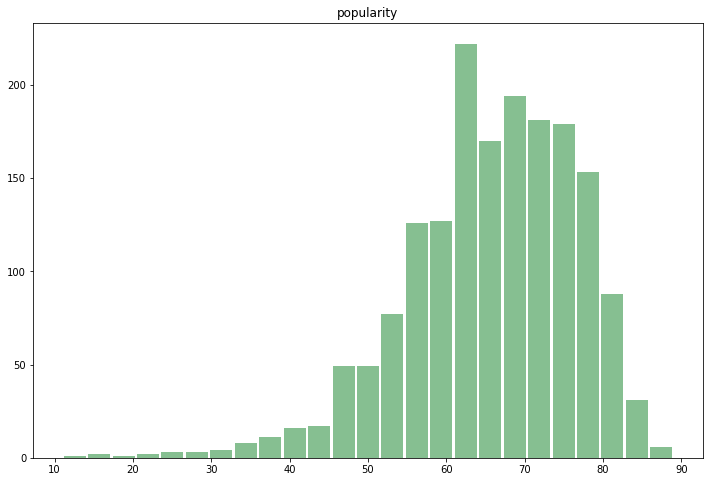

In [62]:
df.hist(column=('popularity'),bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

### Discretization 
- 11-62 not popular
- 62-72 semi-popular
- 72-89 popular

[11. 62. 72. 89.]


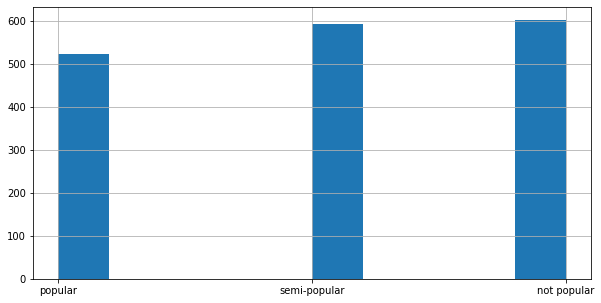

In [74]:
pop, bins = pd.qcut(df.popularity, 3, labels=["not popular", "semi-popular", "popular"], retbins = True)
print(bins)
pop.hist()